In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
import yaml

%matplotlib inline

In [62]:
try:
    with open("../config.yaml", "r") as file:
        config = yaml.safe_load(file)
except:
    print("Configuration file not found!")

In [63]:
# Load Datasets
df_clients = pd.read_csv('../data/raw_data_txt/df_final_demo.txt', sep=',')
df_web_1 = pd.read_csv('../data/raw_data_txt/df_final_web_data_pt_1.txt', sep=',')
df_web_2 = pd.read_csv('../data/raw_data_txt/df_final_web_data_pt_2.txt', sep=',')
df_groups = pd.read_csv('../data/raw_data_txt/df_final_experiment_clients.txt', sep=',')
# Merge Logs
df_logs = pd.concat([df_web_1, df_web_2], ignore_index=True)

In [65]:
# Load the DataFrame from a pickle file
df = pd.read_pickle(config['data']['clean']['df_full'])
df

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,5.0,60.0,79.0,U,2.0,189023.86,1.0,4.0
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,5.0,60.0,79.0,U,2.0,189023.86,1.0,4.0
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,5.0,60.0,79.0,U,2.0,189023.86,1.0,4.0
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,5.0,60.0,79.0,U,2.0,189023.86,1.0,4.0
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,5.0,60.0,79.0,U,2.0,189023.86,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747568,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
747569,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
747570,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
747571,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
# EDA: Shape, Head and Dtype of demo (Client Profile)
print(f"Shape: {df_clients.shape[0]} rows × {df_clients.shape[1]} columns\nHead:\n{df_clients.head(3)} \n\nData Types:\n{df_clients.dtypes} \n\nNumerical Columns: {df_clients.select_dtypes(include=['int64', 'float64']).columns.tolist()} \n\nNulls for Numerical Columns:\n{df_clients.select_dtypes(include=['int64', 'float64']).isnull().sum()}\n\nNulls for Categorical Columns:\n{df_clients.select_dtypes(include=['object']).isnull().sum()}\n\nUniques For Categorical Columns:\n {df_clients.select_dtypes(include=['object']).value_counts()}\n\nDuplicates for Numerical: {df_clients.select_dtypes(include=['int64', 'float64']).duplicated().sum()} \n\nUniques For Numerical Columns:\n{df_clients.select_dtypes(include=['int64', 'float64']).nunique()}")

Shape: 70609 rows × 9 columns
Head:
   client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
0     836976             6.0              73.0      60.5     U        2.0   
1    2304905             7.0              94.0      58.0     U        2.0   
2    1439522             5.0              64.0      32.0     U        2.0   

         bal  calls_6_mnth  logons_6_mnth  
0   45105.30           6.0            9.0  
1  110860.30           6.0            9.0  
2   52467.79           6.0            9.0   

Data Types:
client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object 

Numerical Columns: ['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'] 

Nulls for Numerical Columns:
client_id            0
clnt_te

In [67]:
# EDA: Shape, Head and Dtype of Experiment (Test/Control Assignments)
print(f"Shape: {df_groups.shape[0]} rows × {df_groups.shape[1]} columns\nHead:\n{df_groups.head(3)} \n\nData Types:\n{df_groups.dtypes} \n\nNumerical Columns: {df_groups.select_dtypes(include=['int64', 'float64']).columns.tolist()} \n\nNulls for Numerical Columns:\n{df_groups.select_dtypes(include=['int64', 'float64']).isnull().sum()}\n\nNulls for Categorical Columns:\n{df_groups.select_dtypes(include=['object']).isnull().sum()}\nUniques For Categorical Columns:\n {df_groups.select_dtypes(include=['object']).value_counts()}\n\nDuplicates for Numerical: {df_groups.select_dtypes(include=['int64', 'float64']).duplicated().sum()} \n\nUniques For Numerical Columns:\n{df_groups.select_dtypes(include=['int64', 'float64']).nunique()}")

Shape: 70609 rows × 2 columns
Head:
   client_id Variation
0    9988021      Test
1    8320017      Test
2    4033851   Control 

Data Types:
client_id     int64
Variation    object
dtype: object 

Numerical Columns: ['client_id'] 

Nulls for Numerical Columns:
client_id    0
dtype: int64

Nulls for Categorical Columns:
Variation    20109
dtype: int64
Uniques For Categorical Columns:
 Variation
Test         26968
Control      23532
Name: count, dtype: int64

Duplicates for Numerical: 0 

Uniques For Numerical Columns:
client_id    70609
dtype: int64


In [69]:
#frequency of age that uses web the most
frequency_age = df['clnt_age'].value_counts()
frequency_age 

clnt_age
58.5    6432
57.5    6115
52.5    6061
59.5    6037
55.5    5913
        ... 
96.0      10
14.0      10
13.5       9
95.5       6
94.5       5
Name: count, Length: 165, dtype: int64

In [70]:
variation_table = df['Variation'].value_counts()
variation_table

Variation
Test       177114
Control    142407
Name: count, dtype: int64

In [71]:
# A frequency table for 'Variation' and 'clnt_age'
Vari_age_table = pd.crosstab(index=df['Variation'], columns=df_full['clnt_age'])

# Display the frequency table
print(Vari_age_table)


clnt_age   17.0  17.5  18.0  18.5  19.0  19.5  20.0  20.5  21.0  21.5  ...  \
Variation                                                              ...   
Control      11   180   169   253   200   456   313   611   346   681  ...   
Test          8   232   140   456   258   510   320   674   474  1003  ...   

clnt_age   91.0  91.5  92.0  92.5  93.0  93.5  94.0  94.5  95.5  96.0  
Variation                                                              
Control      17     6    27    18    12    32    12     0     0     4  
Test         22    19    15    10    15     0    13     5     6     6  

[2 rows x 158 columns]


In [72]:
# Group by 'clnt_age' and 'Variation', then count occurrences
most_frequent_variation = df.groupby(['clnt_age', 'Variation']).size().reset_index(name='count')

most_frequent_variation = most_frequent_variation.loc[most_frequent_variation.groupby('clnt_age')['count'].idxmax()]
print(most_frequent_variation)

     clnt_age Variation  count
0        17.0   Control     11
3        17.5      Test    232
4        18.0   Control    169
7        18.5      Test    456
9        19.0      Test    258
..        ...       ...    ...
305      93.5   Control     32
307      94.0      Test     13
308      94.5      Test      5
309      95.5      Test      6
311      96.0      Test      6

[158 rows x 3 columns]


In [42]:
# idea of wide format age range using web
wide_format = age_table.pivot_table(index=None, columns='clnt_age', values='count', aggfunc='sum')
wide_format 

clnt_age,13.5,14.0,14.5,15.0,15.5,16.0,16.5,17.0,17.5,18.0,...,91.0,91.5,92.0,92.5,93.0,93.5,94.0,94.5,95.5,96.0
col_0,,,,,,,,,,,,,,,,,,,,,
count,1,2,23,22,37,40,65,61,123,154,...,6,6,5,4,3,4,3,1,1,2


In [43]:
# top age ranges using vanguard
sorted_age_groups = age_table.sort_values(by='count', ascending=False)
print(sorted_age_groups)

col_0  clnt_age  count
90         58.5    859
84         55.5    830
32         29.5    829
30         28.5    827
88         57.5    826
..          ...    ...
164        96.0      2
1          14.0      2
162        94.5      1
163        95.5      1
0          13.5      1

[165 rows x 2 columns]


In [73]:
### Data Clean ### 

# Clean Clients
df_clients_clean = df_clients.dropna().copy()
df_clients_clean.loc[:, 'clnt_tenure_mnth'] = df_clients_clean['clnt_tenure_yr'] * 12
tenure_mismatch = df_clients_clean[
    df_clients_clean['clnt_tenure_yr'] * 12 != df_clients_clean['clnt_tenure_mnth']
]
print(f"==> Tenure mismatches fixed: {len(tenure_mismatch)} remain")

# Clean Groups
df_groups_clean = df_groups.copy()

# Clean Logs and Filter by Date
df_logs = df_logs.copy()
df_logs['date_time'] = pd.to_datetime(df_logs['date_time'])

# Keep only logs within experiment window
df_logs = df_logs[
    (df_logs['date_time'] >= '2017-03-15') &
    (df_logs['date_time'] <= '2017-06-20')
]
step_counts = df_logs['process_step'].value_counts()
print(f"==> Funnel steps (logs within experiment window): {step_counts.to_dict()}")

# Join Datasets
df_logs_groups = df_logs.merge(
    df_groups_clean[['client_id','Variation']],
    on='client_id',
    how='left'
)
df_full = df_logs_groups.merge(
    df_clients_clean,
    on='client_id',
    how='left'
)

# Validation Checks of This Dataset
print(f"==> df_full shape: {df_full.shape}, unique clients: {df_full['client_id'].nunique()}")
print(f"==> Variation distribution: {df_full['Variation'].value_counts(dropna=False).to_dict()}")
print(f"==> Confirmations in df_full: {(df_full['process_step']=='confirm').sum()}")
print("Sample covers from", df_full['date_time'].min(), "to", df_full['date_time'].max())

# Validation: distinct visit_id count per client
visit_counts = (
    df_full
    .groupby('client_id')['visit_id']
    .nunique()
    .reset_index(name='n_visits')
)
print("\nVisits per client distribution:\n",
      visit_counts['n_visits'].value_counts().sort_index().to_dict())
multi = (visit_counts['n_visits'] > 1).sum()
print(f"Clients with >1 visit_id: {multi}")

# Step Counts by Variation (with Totals)
step_by_var = (
    df_full[df_full['Variation'].notna()]
    .groupby(['Variation','process_step'])['client_id']
    .nunique()
    .unstack(fill_value=0)
)
step_by_var.loc['Total'] = step_by_var.sum()
print("\n==> Step counts by groups assigment:")
print(step_by_var)

# Save to pickle: full structure, fast to load
df_full.to_pickle("../data/clean_data_txt/df_full.pkl")

==> Tenure mismatches fixed: 0 remain
==> Funnel steps (logs within experiment window): {'start': 241320, 'step_1': 161459, 'step_2': 131710, 'step_3': 111241, 'confirm': 101843}
==> df_full shape: (747573, 14), unique clients: 119074
==> Variation distribution: {nan: 428052, 'Test': 177114, 'Control': 142407}
==> Confirmations in df_full: 101843
Sample covers from 2017-03-15 00:03:03 to 2017-06-19 23:59:59

Visits per client distribution:
 {1: 91572, 2: 20702, 3: 4604, 4: 1309, 5: 463, 6: 191, 7: 93, 8: 64, 9: 32, 10: 17, 11: 5, 12: 10, 13: 4, 14: 1, 15: 1, 16: 1, 17: 3, 18: 1, 21: 1}
Clients with >1 visit_id: 27502

==> Step counts by groups assigment:
process_step  confirm  start  step_1  step_2  step_3
Variation                                           
Control         15326  23272   20029   18532   17307
Test            18612  26579   24185   22176   20805
Total           33938  49851   44214   40708   38112


In [74]:
# Measure age for the test group

test_group = df[df['Variation'] == 'Test']
mean_age_test_group = test_group['clnt_age'].mean()
print(f"The mean age of the test group is: {mean_age_test_group}")

The mean age of the test group is: 48.76155579653665


In [75]:
# Measure age for the control group

control_group = df[df['Variation'] == 'Control']
mean_age_control_group = control_group['clnt_age'].mean()
print(f"The mean age of the control group is: {mean_age_control_group}")

The mean age of the control group is: 48.302375081663186


In [44]:
#mean age using vanguard 
mean_age = df['clnt_age'].mean()
print(mean_age)

47.65550019344436


In [46]:
#mode age using vanguard
mode_age = df['clnt_age'].mean()
print(mode_age)

47.65550019344436


In [47]:
#min/max age using vanguard
min_age = df_demo['clnt_age'].min()
max_age = df_demo['clnt_age'].max()
print(min_age)
print(max_age) 

13.5
96.0


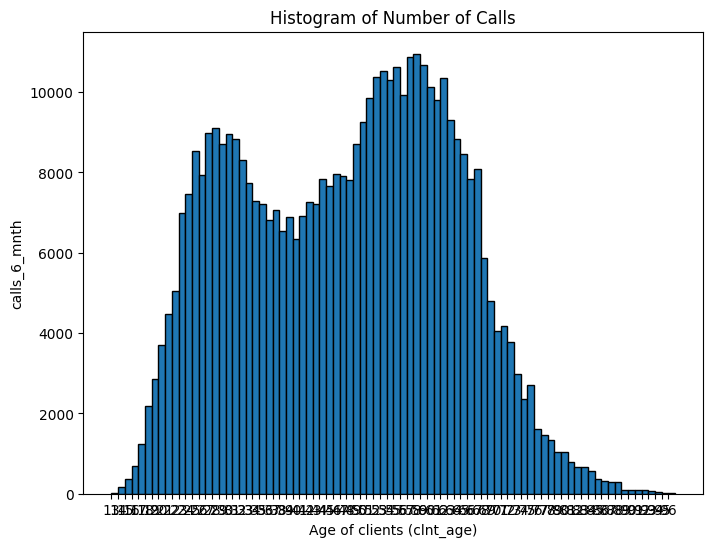

In [50]:
#calls per clnt_age in 6 months
plt.figure(figsize=(8,6))
plt.hist(df['clnt_age'], 
         bins=range(int(df['clnt_age'].min()), int(df['clnt_age'].max())+2), 
         edgecolor='black')
plt.xlabel("Age of clients (clnt_age)")
plt.ylabel("calls_6_mnth")
plt.title("Histogram of Number of Calls")
plt.xticks(range(int(df['clnt_age'].min()), int(df['clnt_age'].max())+1))
plt.show()

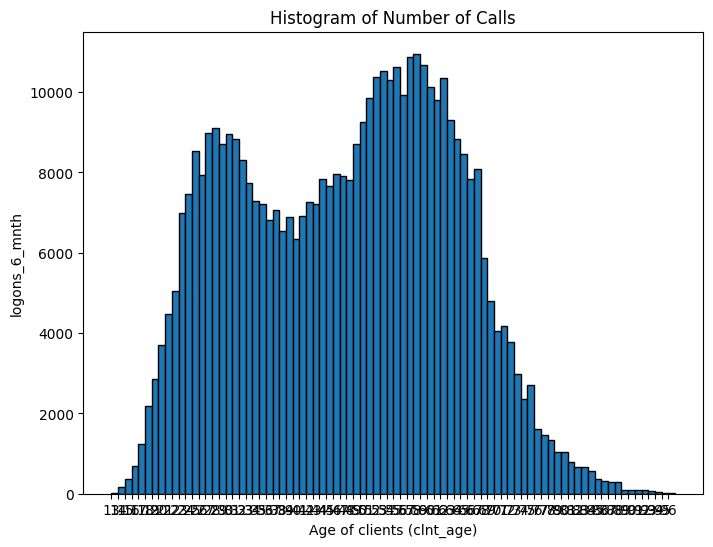

In [54]:
#logons per clt age in 6 months
plt.figure(figsize=(8,6))
plt.hist(df['clnt_age'], 
         bins=range(int(df['clnt_age'].min()), int(df_demo['clnt_age'].max())+2), 
         edgecolor='black')
plt.xlabel("Age of clients (clnt_age)")
plt.ylabel("logons_6_mnth")
plt.title("Histogram of Number of Calls")
plt.xticks(range(int(df['clnt_age'].min()), int(df['clnt_age'].max())+1))
plt.show()

In [55]:
#age and crosstab month tenure
crosstab_age_mth = pd.crosstab(df['clnt_age'], df['clnt_tenure_mnth'])

crosstab_age_mth

clnt_tenure_mnth,24.0,36.0,48.0,60.0,72.0,84.0,96.0,108.0,120.0,132.0,...,552.0,564.0,576.0,588.0,600.0,612.0,624.0,648.0,660.0,744.0
clnt_age,,,,,,,,,,,,,,,,,,,,,
13.5,0,0,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14.0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14.5,5,0,53,66,0,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15.0,0,17,37,19,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15.5,0,0,97,59,48,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93.5,0,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
94.0,0,0,0,12,0,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
#age and crosstab  year tenure
crosstab_age_yr = pd.crosstab(df['clnt_age'], df['clnt_tenure_yr'])

crosstab_age_yr

clnt_tenure_yr,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,...,46.0,47.0,48.0,49.0,50.0,51.0,52.0,54.0,55.0,62.0
clnt_age,,,,,,,,,,,,,,,,,,,,,
13.5,0,0,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14.0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14.5,5,0,53,66,0,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15.0,0,17,37,19,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15.5,0,0,97,59,48,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93.5,0,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
94.0,0,0,0,12,0,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


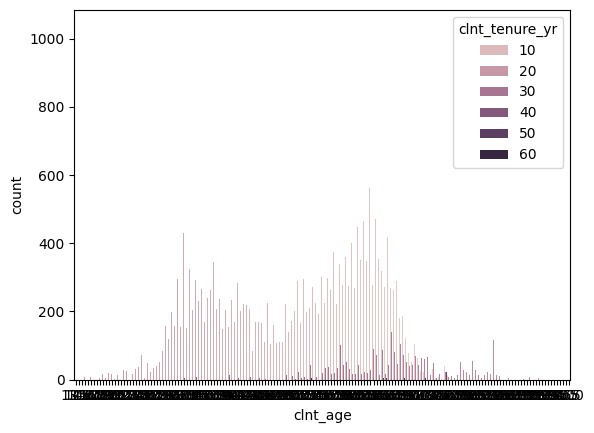

In [57]:
#age and year tenure
sns.countplot(data=df, x='clnt_age', hue='clnt_tenure_yr')
plt.show()

/var/folders/2n/vdp8fcl915n4gbp1vcj_4vgw0000gp/T/ipykernel_46015/2501776786.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='clnt_age', y='clnt_tenure_yr', palette="coolwarm")


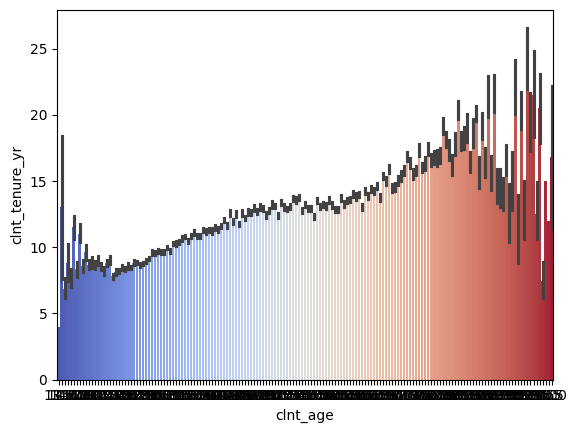

In [58]:
# Plotting a bar plot to visualize the age 'clnt_age' for each 'clnt_tenure_yr' category, using the "coolwarm" color palette
sns.barplot(data=df, x='clnt_age', y='clnt_tenure_yr', palette="coolwarm")
plt.show()

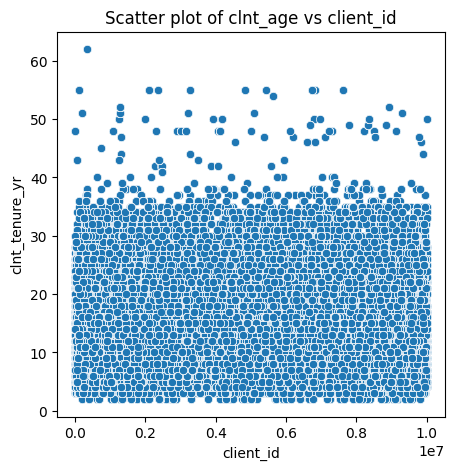

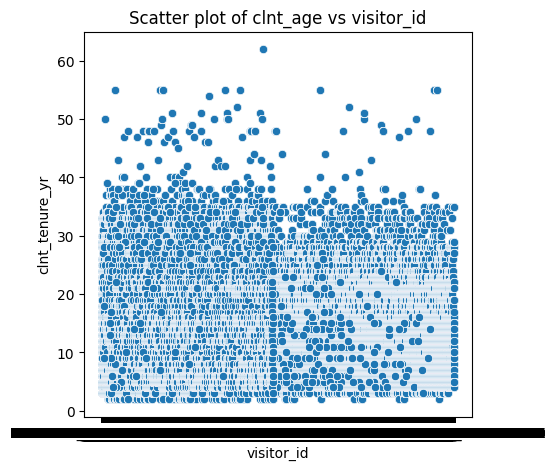

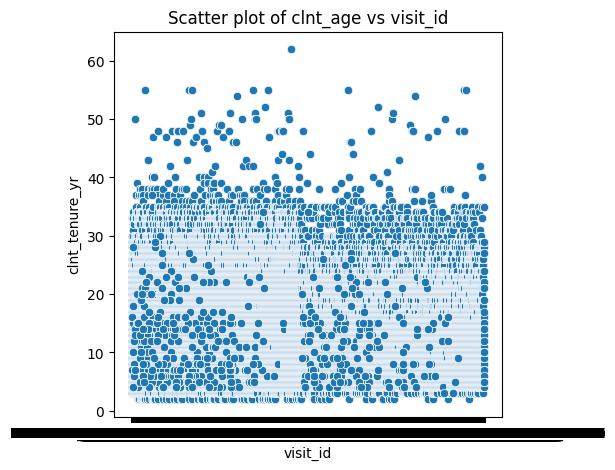

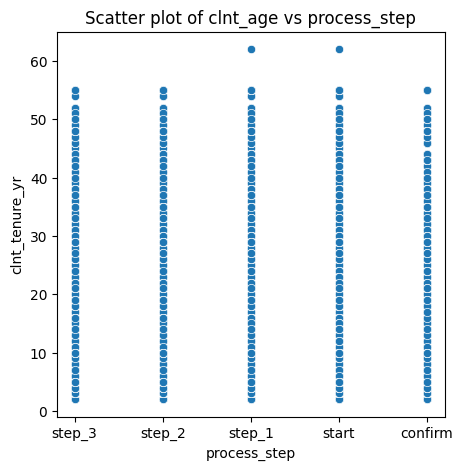

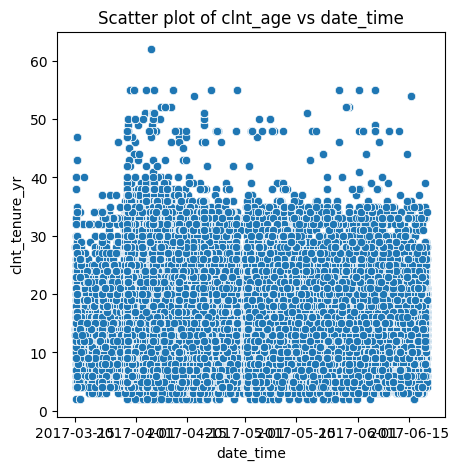

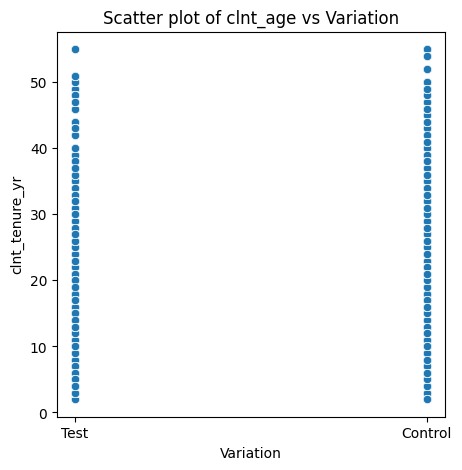

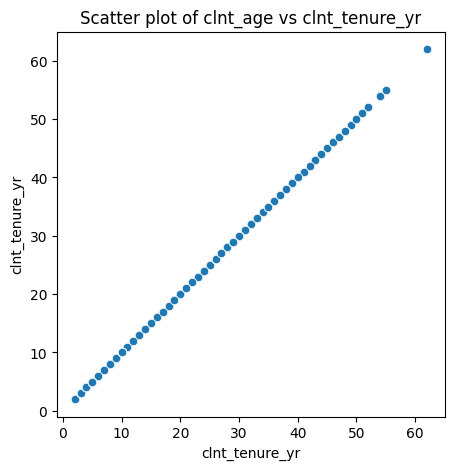

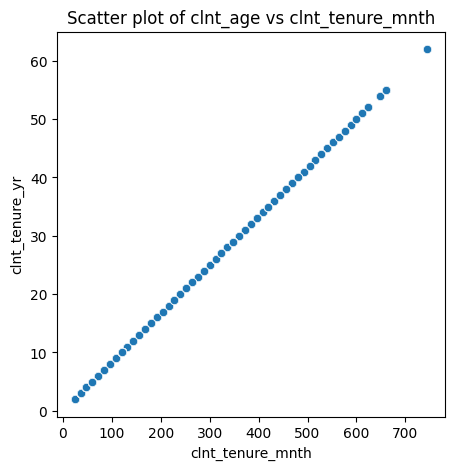

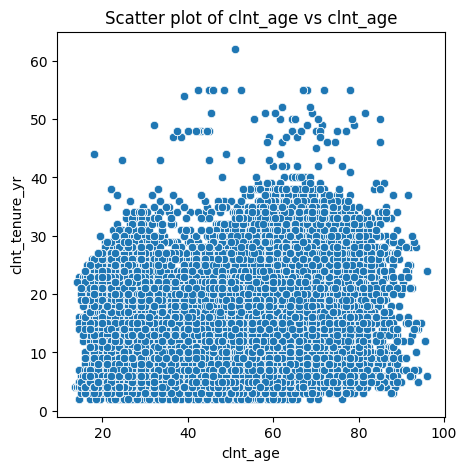

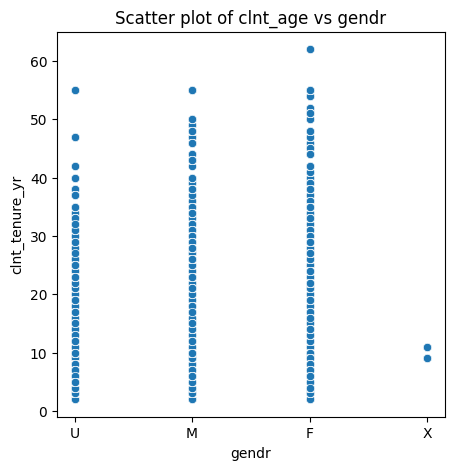

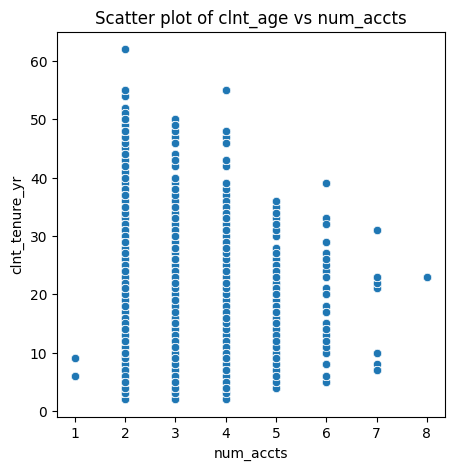

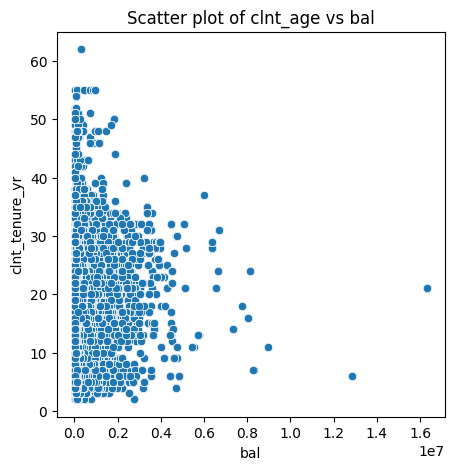

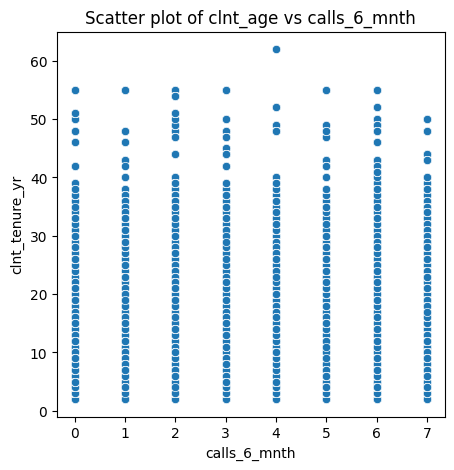

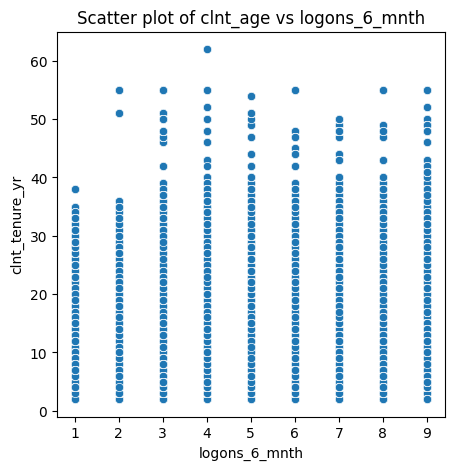

In [59]:
# Plotting scatter plots for each 'clnt_age' and clnt_tenure_yr to visualize their relationships
for col in df.columns:
    plt.figure(figsize=(5, 5))
    plt.title('Scatter plot of clnt_age vs ' + col)
    sns.scatterplot(data=df, x=col, y='clnt_tenure_yr')
    plt.show()

In [25]:
pd.read_pickle(config['data']['clean']['df_full'])

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,5.0,60.0,79.0,U,2.0,189023.86,1.0,4.0
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,5.0,60.0,79.0,U,2.0,189023.86,1.0,4.0
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,5.0,60.0,79.0,U,2.0,189023.86,1.0,4.0
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,5.0,60.0,79.0,U,2.0,189023.86,1.0,4.0
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,5.0,60.0,79.0,U,2.0,189023.86,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747568,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
747569,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
747570,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
747571,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
sorted_age_groups = age_table.sort_values(by='count', ascending=False)
print(sorted_age_groups)

col_0  clnt_age  count
90         58.5    859
84         55.5    830
32         29.5    829
30         28.5    827
88         57.5    826
..          ...    ...
164        96.0      2
1          14.0      2
162        94.5      1
163        95.5      1
0          13.5      1

[165 rows x 2 columns]
